# <font color='green'>ĐỒ ÁN CUỐI KÌ: FINAL-PROJECT
## Danh sách các thành viên :
| STT | Họ và tên | MSSV | Nội dung công việc | Hoàn thành |
| :--- | :---: | :---: | :---: | ---: |
| 01 | Hồ Hữu Ngọc | 19120602 |Được phân công trong Google Sheet| 100%|
| 02 | Lê Thành Lộc | 19120562 |Được phân công trong Google Sheet| 100% |
    
## Phân công công việc : Link [Google sheet](https://docs.google.com/spreadsheets/d/1jpldzAcS5lXlWlZEu9rmxLH2_rfZBTTEl-8P5THPHjY/edit?usp=sharing)

## Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Thu thập dữ liệu

#### Dữ liệu này là bộ dữ liệu bán hàng của một siêu thị bọn em tìm được từ kaggle được public [ở đây](https://www.kaggle.com/aungpyaeap/supermarket-sales). Dữ liệu này là các hóa đơn từ các chi nhánh của siêu thị lưu lại.
#### Context :
The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.
#### Description
**Attribute information** <br/>
Invoice id: Computer generated sales slip invoice identification number <br/>
Branch: Branch of supercenter (3 branches are available identified by A, B and C). <br/>
City: Location of supercenters <br/>
Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card. <br/>
Gender: Gender type of customer <br/>
Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel <br/>
Unit price: Price of each product (dola) <br/>
Quantity: Number of products purchased by customer <br/>
Tax: 5% tax fee for customer buying <br/>
Total: Total price including tax <br/>
Date: Date of purchase (Record available from January 2019 to March 2019) <br/>
Time: Purchase time (10am to 9pm) <br/>
Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet) <br/>
COGS: Cost of goods sold <br/>
Gross margin percentage: Gross margin percentage <br/>
Gross income: Gross income <br/>
Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10) <br/>
**Dữ liệu này được tác giả cho phép sử dụng với mục đích phân tích hoặc các mục đích khác** <br/>
**License : Other ("This dataset can be used for predictive data analytics purpose")**

---

## Khám phá dữ liệu

### Đọc dữ liệu vào Dataframe

In [2]:
sales_df = pd.read_csv('./Data/sales.csv')
sales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
sales_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột? 

In [4]:
num_rows, num_cols = sales_df.shape
print('Dữ liệu bao gồm {} dòng và {} cột'.format(num_rows, num_cols))

Dữ liệu bao gồm 1000 dòng và 17 cột


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo mô tả dữ liệu trong kaggle và theo quan sát sơ bộ về dữ liệu thì mỗi dòng cho biết thông tin về `hóa đơn của một sản phẩm được bán ra`. Và có vẻ như không có dòng nào có ý nghĩa khác.

### Dữ liệu có các dòng bị lặp không? 

In [5]:
num_duplicated = sales_df.duplicated().sum()
print("Dữ liệu có",num_duplicated,"dòng bị lặp")

Dữ liệu có 0 dòng bị lặp


### Mỗi cột có ý nghĩa gì?

Theo như trong kaggle, thì các cột trong file được mô tả như sau: 
- **Invoice id**: Id của hóa đơn
- **Branch**: Tên chi nhánh bán hàng của siêu thị (A,B hoặc C).
- **City**: Tên thành phố của siêu thị.
- **Customer type**: Loại khách hàng bao gồm khách hàng thường (Không có thẻ thành viên), Khách hàng thành viên (Nếu có thẻ thành viên).
- **Gender**: Giới tính của khách hàng (Male, Female).
- **Product line**: Dòng sản phẩm được bán ra.
- **Unit price**: Giá của sản phẩm (Đơn vị tiền tệ: đô la).
- **Quantity**: Số lượng sản phẩm khách hàng đã mua.
- **Tax**: 5% tiền thuế cho tất cả các sản phẩm khách hàng cần chi trả.
- **Total**: Tổng giá tiền khách hàng phải trả bao gồm cả thuế
- **Date**: Ngày mua hàng.
- **Time**: Thời gian mua hàng.
- **Payment**: Phương thức thanh toán khách hàng sử dụng để mua hàng (3 phương thức : `Cash`: Tiền mặt, `Credit card`: Thẻ tín dụng và `Ewallet`: Ví điện tử).
- **COGS**: Giá vốn của sản phẩm.
- **Gross margin percentage**: Tỷ lệ lợi nhuận.
- **Gross income**: Tổng thu nhập.
- **Rating**: Đánh giá của khách hàng(1 sao đến 10 sao)

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không? 

- Khi đọc dữ liệu từ file `sales.csv` lên, không xuất hiện warning rằng có một cột nào đó có dtype không đồng nhất nên ta không phải lo các cột có kiểu dữ liệu `object` có thể có các phần tử có kiểu dữ liệu khác nhau.

In [6]:
sales_df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

- Nhận thấy rằng, cột `Date` và `Time` có kiểu dữ liệu là object, ta cần thay đổi nó thành Datetime (theo từng format) để tiện cho việc xử lý dữ liệu sau này (tìm min, max, median, ...). Các cột còn lại có vẻ kiểu dữ liệu đã khá đúng.

In [7]:
sales_df['Date'].sample(10)

731    2/28/2019
947     2/3/2019
608    1/23/2019
242    2/28/2019
937    3/30/2019
537     3/7/2019
458    1/27/2019
953    1/13/2019
492     3/5/2019
40     1/17/2019
Name: Date, dtype: object

In [8]:
sales_df['Time'].sample(10)

879    10:17
594    13:05
253    11:22
262    19:22
202    10:02
207    17:38
833    14:42
576    18:43
717    12:47
409    19:24
Name: Time, dtype: object

In [9]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df['Time'] = pd.to_datetime(sales_df['Time'])

- Thử xuất ra một vài giá trị của các cột `Date` và `Time` trước khi thay đổi kiểu dữ liệu ở bước tiền xử lý

In [10]:
sales_df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


---

## Tiền xử lý

### Chuyển dtype của cột "Date" và "Time" sang datetime

In [11]:
sales_df['Date']= pd.to_datetime(sales_df['Date'], format='%m/%d/%Y')
sales_df['Time']= pd.to_datetime(sales_df['Time'], format = '%H:%M')

Kiểm tra lại kiểu dữ liệu của 2 cột `Date` và `Time`

In [12]:
sales_df['Date'].dtype

dtype('<M8[ns]')

In [13]:
sales_df['Time'].dtype

dtype('<M8[ns]')

**Kiểu dữ liệu của toàn bộ cột trong dataframe `sales_df` lúc này**

In [14]:
sales_df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

### Đổi tên cột "Invoice ID" thành "ID" để tiện sử dụng sau này

In [15]:
sales_df.rename(columns = {'Invoice ID':'ID'}, inplace = True)

### Cột "ID" có vẻ như còn các dấu "-" cần được xóa đi

In [16]:
sales_df['ID'] = sales_df['ID'].str.replace('-','')
sales_df

,ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750678428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-01-21 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226313081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-01-21 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631413108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-01-21 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123191176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-01-21 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373737910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-01-21 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233675758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2022-01-21 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303962227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2022-01-21 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727021313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2022-01-21 13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347562442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2022-01-21 15:33:00,Cash,65.82,4.761905,3.2910,4.1


## Quay lại bước khám phá dữ liệu 

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào? 


- Ta sẽ xếp các cột datetime vào nhóm numeric luôn. Hiện có 11 cột có vẻ là thuộc nhóm numeric: "ID", "Unit price", "Quantity", "Tax 5%", "Total", "Date", "Time", "cogs", "gross margin percentage", "gross income", "Rating". Tuy nhiên, cột "ID" thật ra là dạng categorical (vì là mã được đánh dưới dạng số). Như vậy, chỉ có 10 cột numeric là "Unit price", "Quantity", "Tax 5%", "Total", "Date", "Time", "cogs", "gross margin percentage", "gross income", "Rating". <br>
<br>
- Với các cột có kiểu dữ liệu numeric, ta sẽ tính:
    - `missing_ratio`: tỉ lệ % (từ 0 đến 100) các giá trị thiếu của cột dữ liệu
    - `min`: giá trị min của cột dữ liệu
    - `max`: giá trị max của cột dữ liệu

In [17]:
def missing_ratio(s):
    return s.isna().mean() * 100

nume_col_profiles_df = sales_df[["Unit price", "Quantity", "Tax 5%", "Total", "Date", "Time", 
                               "cogs", "gross margin percentage", "gross income", 
                               "Rating"]].agg([missing_ratio, pd.Series.min, pd.Series.max])
nume_col_profiles_df

,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating
missing_ratio,0.00,0.0,0.0000,0.0000,0.0,0.0,0.00,0.000000,0.0000,0.0
min,10.08,1.0,0.5085,10.6785,2019-01-01 00:00:00,2022-01-21 10:00:00,10.17,4.761905,0.5085,4.0
max,99.96,10.0,49.6500,1042.6500,2019-03-30 00:00:00,2022-01-21 20:59:00,993.00,4.761905,49.6500,10.0


Theo đó ta thấy các cột dữ liệu dạng numerical không bị thiếu ở bất kì vị trí nào và các giá trị min max cũng không có dấu hiệu bất thường

### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào? 

- `sales_df` có 7 cột categorical là "ID", "Branch", "City", "Customer type", "Gender", "Product line", "Payment". <br>
<br>
- Với các cột có kiểu dữ liệu categorical, ta sẽ tính:
    - `missing_ratio`: tỉ lệ % (từ 0 đến 100) các giá trị thiếu của cột dữ liệu
    - `num_diff_vals`: số lượng các giá trị khác nhau
    - `diff_vals`: list các giá trị khác nhau

In [18]:
def num_diff_vals(s):
    return s.nunique()

def diff_vals(s):
    return s.dropna().unique()

cate_col_profiles_df = sales_df[["ID", "Branch", "City", "Customer type", "Gender", "Product line", "Payment"]].agg([missing_ratio, num_diff_vals, diff_vals])
cate_col_profiles_df

,ID,Branch,City,Customer type,Gender,Product line,Payment
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_diff_vals,1000,3,3,2,2,6,3
diff_vals,"[750678428, 226313081, 631413108, 123191176, 3...","[A, C, B]","[Yangon, Naypyitaw, Mandalay]","[Member, Normal]","[Female, Male]","[Health and beauty, Electronic accessories, Ho...","[Ewallet, Cash, Credit card]"


---

## Phân tích dữ liệu sơ bộ và trả lời một vài câu hỏi đơn giản để hiểu rõ hơn về tập dữ liệu

### Câu hỏi đơn giản 1

**1. Chúng ta hay nghĩ rằng, những người phụ nữ thường hay đi mua sắm nhiều hơn hẳn đàn ông. Liệu rằng suy nghĩ đó có đúng không?**

In [19]:
sales_df['Gender'].nunique()

2

In [20]:
sales_df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

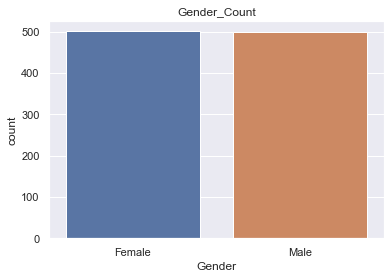

In [21]:
sns.set(style="darkgrid")       
genderCount  = sns.countplot(x="Gender", data =sales_df).set_title("Gender_Count")

=> Theo như sự phân tích về dữ liệu cột `Gender` trong tập dữ liệu ở file `sales.csv` ở trên, có vẻ như dự đoán của chúng ta là không hoàn toàn đúng khi số lượng 2 nhóm giới tính "Male" và "Female" mua hàng ở các chi nhánh của siêu thị gần như là tương đương nhau.

### Câu hỏi đơn giản 2

**2. Như đã kiểm tra, siêu thị chia khách hàng thành 2 loại là `Member`: `Khách hàng thành viên` và `Normal`: `Khách hàng thường`. Vậy số lượng giữa 2 loại khách hàng này là bao nhiêu, có chênh lệch lắm không?**

In [22]:
sales_df['Customer type'].nunique()

2

In [23]:
sales_df['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

Text(0.5, 1.0, 'Customer Type')

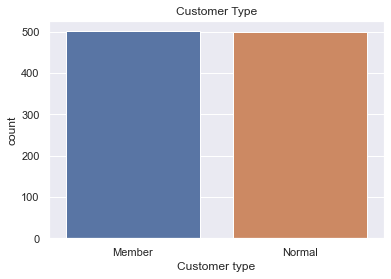

In [24]:
 sns.countplot(x="Customer type", data =sales_df).set_title("Customer Type") 

=> Theo như phân tích ở trên, số lượng giữa 2 loại khách hàng này gần như là tương đương nhau, không hề có sự chênh lệch. Nhiều khả năng những đặc quyền của "Khách hàng thành viên" là không quá đáng kể.

### Câu hỏi đơn giản 3

**3. Phương thức thanh toán nào được khách hàng ưu tiên sử dụng khi thanh toán hóa đơn nhất, có sự chênh lệch rõ ràng nào giữa các phương phức không?**

In [25]:
sales_df['Payment'].nunique()

3

In [26]:
sales_df['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

Text(0.5, 1.0, 'Payment Channel')

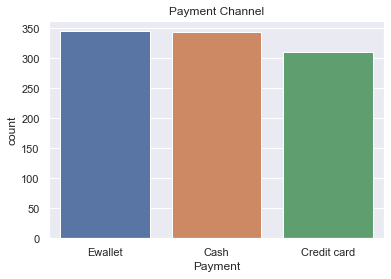

In [27]:
 sns.countplot(x="Payment", data =sales_df).set_title("Payment Channel") 

=> Dường như việc sử dụng thẻ tín dụng để thanh toán là chưa được khách hàng áp dụng nhiều, có thể là do số đông khách hàng chưa có nhu cầu làm thẻ tín dụng. Trong khi đó, phương thức thanh toán tiền mặt và sử dụng ví điện tử phần nào được áp dụng nhiều hơn hẳn.

### Câu hỏi đơn giản 4

**4. Các chi nhánh A, B và C đều thuộc sở hữu của siêu thị. Liệu rằng cả 3 chi nhánh sẽ có dịch vụ, sản phẩm tốt giống nhau và sẽ có lượt "Rating" từ khách hàng là tương đương nhau không?**

In [28]:
sales_df['Branch'].nunique()

3

In [29]:
sales_df['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [30]:
# Tạo mới list_branch là các chi nhánh được sắp xếp theo thứ tự alpha - beta
branch_list = sales_df['Branch'].unique()
branch_list.sort()

Text(0.5, 1.0, 'Ratings by Branch')

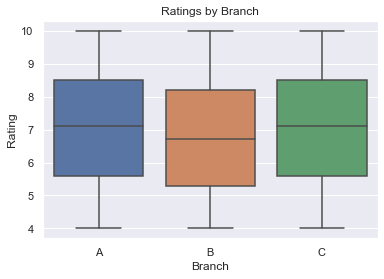

In [31]:
sns.boxplot(x="Branch", y = "Rating", data =sales_df, order = branch_list).set_title("Ratings by Branch")

=> Vì một lí do nào đó, chi nhánh B có lượt `ratings` khá thấp và thấp nhất trong 3 chi nhánh trong khi chi nhánh A và chi nhánh C có lượt "Rating" gần như là tương đương nhau. Siêu thị cần xem xét lại chất lượng dịch vụ cũng như chất lượng sản phẩm ở chi nhánh này (B)

### Câu hỏi đơn giản 5

**5. Trong các dòng sản phẩm (`Product line`) được bán ra từ siêu thị, dòng sản phẩm nào là được bán chạy nhất và dòng sản phẩm nào là ít được bán nhất? Có sự chênh lệch nhiều giữa số lượng được bán ra giữa các dòng sản phẩm không?**

In [32]:
sales_df['Product line'].nunique()

6

In [33]:
sales_df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Product line'>

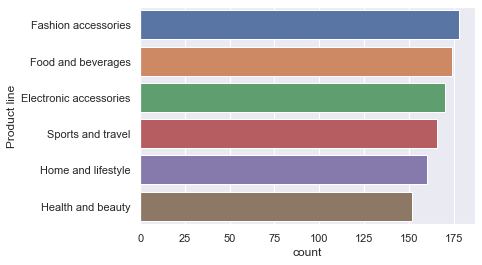

In [34]:
sns.countplot(y = 'Product line', data=sales_df, order = sales_df['Product line'].value_counts().index)

=> Như đã phân tích phía bên, dòng sản phẩm "Fashion accessories" được bán chạy nhất và dòng sản phẩm "Health and beauty" ít được bán chạy nhất. Nhìn chung, số lượng được bán ra giữa các dòng sản phẩm là không chệch quá nhiều.

## Đưa ra các câu hỏi chuyên sâu cần trả lời

### Câu hỏi 1:

Từ kết quả của việc trả lời [Câu hỏi đơn giản 4](#Câu-hỏi-đơn-giản-4), ta nhận được một kết quả hơi ngoài dự đoán rằng: "chi nhánh B có lượt Rating từ khách hàng là thấp nhất và có chênh lệch đáng kể so với 2 chi nhánh còn lại" trong khi chúng thuộc một siêu thị. Vậy lý do là gì? <br>
=> Một vài lí do được nghĩ đến như: `product quality` (chất lượng sản phẩm), `service quality` (chất lượng dịch vụ), ... nhưng trong tập dữ liệu của file 'sales.csv' chỉ cho phép xét đến `product quality` (dựa vào lượt `Rating` của từng `Product line`)

**Lợi ích**: nếu tìm ra nguyên nhân làm cho số lượt `Rating` của chi nhánh B thấp (thường thì Rating thấp thì khả năng chi nhánh này sẽ kinh doanh không lời hoặc chỉ lời ít vì khách hàng sẽ ít tới mua sắm) sẽ giúp siêu thị tránh việc mất cân bằng kinh doanh giữa các chi nhánh, tránh được việc "sinh đầu này đắp đầu kia", làm siêu thị kinh doanh không được ổn định.

Ta lần lượt làm các bước sau:
- Bước 1: Tạo `prod_line_order` là các nhãn index (các unique `Product line`) 
- Bước 2: Vẽ biểu đồ dạng cột có trục hoành là các `Product line` (các dòng sản phẩm), mỗi dòng sản phẩm có 3 cột biểu hiện cho số lượng đơn hàng của 3 branch A, B, C, trục tung là số đơn hàng.
- Bước 3: Vẽ biểu đồ thể hiện được số lượt `Rating` trung bình của từng dòng sản phẩm
- Bước 4: Dựa vào sự tương quan giữa 2 đồ thị để nhận xét và rút ra kết luận

***Code bước 1 :***

In [35]:
prod_line_order = sales_df['Product line'].value_counts().index

***Code bước 2 :***

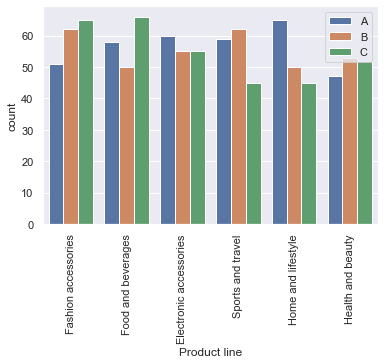

In [36]:
fig = plt.figure()
ax1 = sns.countplot(x='Product line', hue='Branch', data=sales_df, order=prod_line_order, 
              hue_order=branch_list)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.legend(title_fontsize='20')

***Code bước 3 :***

<AxesSubplot:xlabel='Rating', ylabel='Product line'>

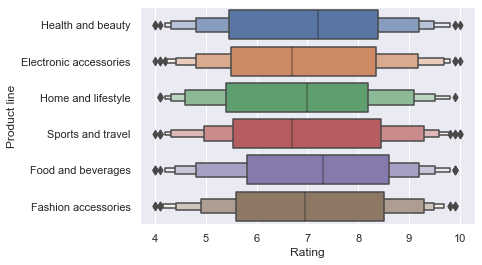

In [37]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=sales_df)

***Code bước 4***

Ở đồ thị 2 ta thấy dòng sản phẩm `Food and beverages` có lượt ratings cao nhất, còn `Sport and travel` có lượt ratings là thấp nhất, dựa vào đồ thị 1 ta thấy rõ rằng ở dòng sản phẩm `Food and beverages`, chi nhánh B lại bán được ít nhất và ở dòng sản phẩm `Sport and travel`, chi nhánh B lại bán được nhiều nhất
=> Vậy nhiều khả năng là như chúng ta dự đoán, chi nhánh B bán nhiều sản phẩm có `Rating` thấp nhưng lại bán ít sản phẩm có `Ratings` cao.

---

### Câu hỏi 2 :

#### Giờ nào là tốt nhất cho doanh số bán hàng tổng thể? Và liệu vào khung giờ đó (giờ tốt nhất), các mặt hàng đều bán chạy hết hay không?

**Lợi ích**: nếu biết được khung giờ nào là tốt nhất cho doanh số bán hàng tổng thể, siêu thị có thể cân nhắc cho nhiều nhân viên làm việc hơn (vì vào những giờ cao điểm thì khách hàng mua sắm rất nhiều => cần nhiều nhân viên giới thiệu & bán hàng, nhân viên thu ngân, ...) => giúp siêu thị tránh việc trì trệ trong việc giới thiệu các mặt hàng mới của cũng như việc mua hàng và thanh toán của khách hàng bị lâu li, và cũng giúp siêu thị sử dụng nhân lực một cách hợp lí. 

Ta lần lượt làm các bước sau:
- **Bước 1:** Thêm cột `Hour` vào dataframe `sales_df` để việc trả lời câu hỏi trở nên thuận tiện
- **Bước 2:** Lấy danh sách toàn bộ các khung giờ khác nhau (tăng dần) từ Series `sales_df['Hour']` rồi lưu vào list `unique_hour_sorted`
- **Bước 3:** Vẽ biểu đồ đường có trục hoành là các khung giờ trong `unique_hour_sorted` và trục tung là tổng doanh thu tổng thể của từng khung giờ
- **Bước 4:** Tạo một dataframe mới có các cột là `Hour` và các dòng sản phẩm, từng dòng dữ liệu là khung giờ kèm theo doanh thu của từng dòng sản phẩm và lưu vào `hourly_sales_each_productline`
- **Bước 5:** Vẽ biểu đồ đường, mỗi đường thể hiển sự thay đổi về doanh thu của từng dòng sản phẩm theo từng khung giờ, trục hoành các khung giờ mà siêu thị mở cửa, trục tung là doanh thu của từng dòng sản phẩm theo từng khung giờ.

***Code bước 1:***

In [38]:
sales_df['Hour'] = (sales_df['Time']).dt.hour

In [39]:
sales_df

,ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour
0,750678428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-01-21 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226313081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-01-21 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10
2,631413108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-01-21 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13
3,123191176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-01-21 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373737910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-01-21 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233675758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2022-01-21 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,13
996,303962227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2022-01-21 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,17
997,727021313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2022-01-21 13:22:00,Cash,31.84,4.761905,1.5920,7.7,13
998,347562442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2022-01-21 15:33:00,Cash,65.82,4.761905,3.2910,4.1,15


***Code bước 2:***

In [40]:
unique_hour_sorted = [pair for pair, df in sales_df.groupby(['Hour'])]

In [41]:
unique_hour_sorted

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

***Code bước 3:***

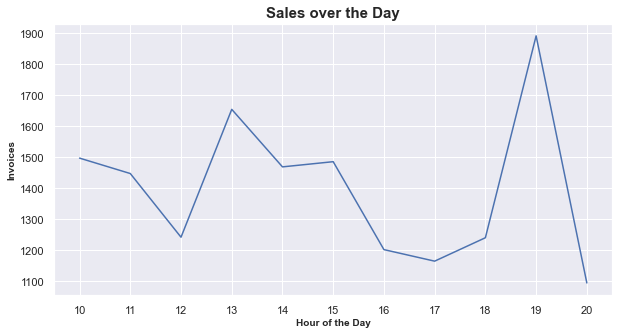

In [42]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(unique_hour_sorted, sales_df.groupby(['Hour']).sum()['gross income'])
plt.xticks(unique_hour_sorted)
plt.xlabel('Hour of the Day', fontweight = 'bold', fontsize =10)
plt.ylabel('Invoices', fontweight = 'bold', fontsize =10)
plt.title('Sales over the Day', fontweight = 'bold', fontsize =15)
plt.show()

=> Nhận thấy, 2 khung giờ có doanh thu tổng thể cao nhất là **13h** và **19h**, trong đó doanh thu đạt mức đỉnh điểm vào lúc **19h**, siêu thị nên cân nhắc điều động nhân viên làm việc nhiều hơn ở 2 khung giờ này, đặc biệt là vào lúc `19h`

=> Vậy nguyên nhân là gì mà doanh thủ tổng thể lại vượt trội ở 2 khung giờ này? Có phải tất cả các dòng sản phẩm đều bán chạy nhất tại 2 khung giờ này hay không, hay có 1 vài dòng sản phẩm nào đó có số lượng bán ra đột biến? Hãy cùng tìm hiểu tiếp xem sao!

***Code bước 4:***

In [43]:
hourly_sales_each_productline = pd.pivot_table(sales_df, values='cogs', index='Hour'
                                               , columns='Product line', aggfunc='sum').reset_index()
hourly_sales_each_productline.set_index('Hour', inplace=True)
hourly_sales_each_productline

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Hour,,,,,,
10,4016.92,5812.04,4613.18,4779.11,5794.98,4908.99
11,5666.84,4160.48,6111.15,3148.20,6003.17,3840.95
12,3279.09,4715.22,4105.62,4147.91,3468.29,5108.52
13,3692.50,7723.23,3569.38,5589.21,5925.70,6569.72
14,5422.45,4519.21,4060.25,7077.90,2708.29,5572.28
15,5482.48,3292.06,7064.95,3279.30,5904.01,4671.97
16,3301.21,5281.33,4345.32,2690.33,3496.61,4910.27
17,3916.11,3922.21,1353.66,3687.96,6736.87,3664.35
18,6140.17,4249.51,3998.61,3723.67,3223.03,3455.81


In [44]:
# Tạo list chứa các dòng sản phẩm 
product_lines = hourly_sales_each_productline.columns.values.tolist()
product_lines

['Electronic accessories',
 'Fashion accessories',
 'Food and beverages',
 'Health and beauty',
 'Home and lifestyle',
 'Sports and travel']

***Code bước 5:***

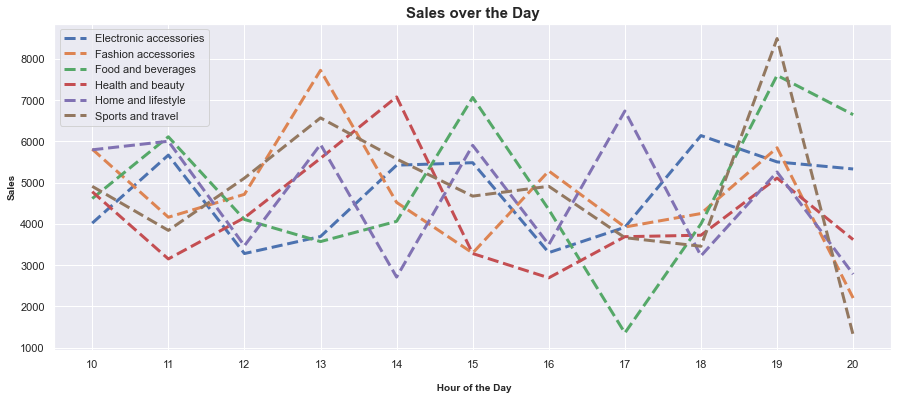

In [45]:
fig1, ax = plt.subplots(figsize=(15,6))
keys = [pair for pair, df in hourly_sales_each_productline.groupby(['Hour'])]
plt.plot(keys, hourly_sales_each_productline.groupby(['Hour']).sum(),'--',linewidth=3.0 )
plt.grid(True)
plt.xticks(keys)
plt.xlabel('\n Hour of the Day', fontweight = 'bold', fontsize =10)
plt.ylabel('Sales', fontweight = 'bold', fontsize =10)
plt.title('Sales over the Day', fontweight = 'bold', fontsize =15)
plt.legend(product_lines)
plt.show()

**NHẬN XÉT**: <br>
- Dựa vào biểu đồ trên, ta có thế thấy rõ những dòng sản phẩm nào sẽ bán chạy vào những khung giờ nào => theo đó các nhân viên của từng quầy bán dòng sản phẩm đó có thể linh hoạt trình bày các mặt hàng ở vị trí thích hợp -> kích cầu khách hàng.
- Đúng như ta dự đoán, ở 2 khung giờ `13h` và `19h`, doanh thu tổng thể vượt trội so với các khung giờ còn lại không đồng nghĩa với việc doanh thu của tất cả các dòng sản phẩm đều cao nhất mà có doanh thu của một vài dòng sản phẩm cao đột biến làm cho doanh thu tổng thể cao vượt trội như vậy.
    - Ví dụ: ở khung giờ 13h, chỉ có 3 dòng sản phầm là `Fashion accessories`, `Sports and travel` và `Home and lifestyle` là cao mà thôi => siêu thị nên điều động nhân viên làm việc nhiều ở các quầy hàng này, tương tự ở khung giờ `19h`, chỉ có 2 dòng sản phẩm là `Food and beverages` và `Sports and travel` có doanh thu cao đột biến mà thôi, nên cũng chỉ cần điều động nhiều nhân viên giới thiệu sản phẩm và bán hàng ở các quầy hàng này. 

---

### Câu hỏi 3

#### Có mối quan hệ nào giữa doanh số bán một dòng sản phẩm nhất định và giới tính của khách hàng mua nó không?

**Lợi ích**: nếu trả lời được câu hỏi này, nhân viên khi bán hàng khi giới thiệu sản phẩm có thể cân nhắc và ưu tiên hơn, tùy dòng sản phẩm mà nhân viên bán hàng sẽ lựa chọn đối tượng (theo giới tính) để giới thiệu.

=> Giúp kích cầu khách hàng mua sản phẩm, các dòng sản phẩm được bán chạy hơn (vì nắm bắt được nhu cầu của khách hàng theo giới tính), doanh thu siêu thị ổn định và lợi nhuận nhiều hơn.

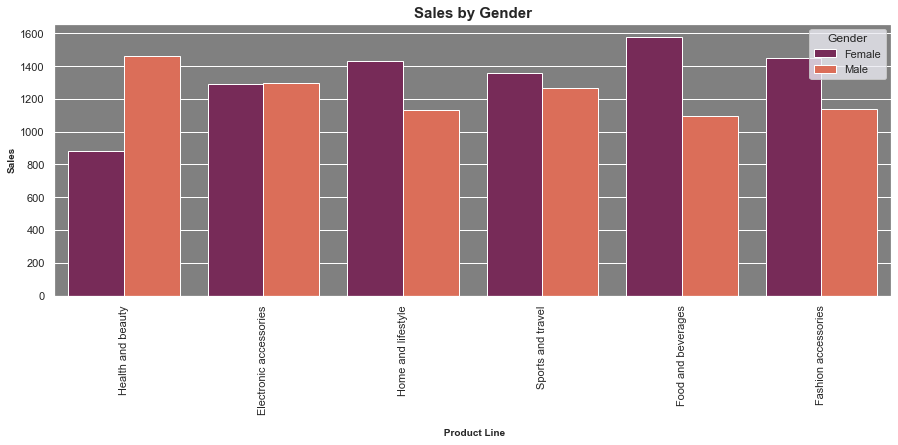

In [46]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x='Product line',y='gross income',data = sales_df, 
            estimator=sum,hue = sales_df['Gender'], palette = 'rocket', ci = None)
ax.set(facecolor = 'grey')
plt.xticks(rotation=90)
plt.xlabel('\n Product Line', fontweight = 'bold', fontsize =10)
plt.ylabel('Sales', fontweight = 'bold', fontsize =10)
plt.title('Sales by Gender', fontweight = 'bold', fontsize =15)
plt.show()

=> Nhận thấy dòng sản phẩm `Heath and beauty` được nhiều khách hàng nam mua nhiều hơn đáng kể so với nữ trong khi các phẩm còn lại, khách hàng nữ luôn mua nhiều mua nhiều hơn khá nhiều so với khách hàng nam.

---

### Câu hỏi 4

#### Mỗi dòng sản phẩm hoạt động như thế nào qua các tháng - doanh số cũng như số lượng có khôn ngoan không?

**Lợi ích**: khi trả lời được câu hỏi này, chúng ta có thể biết được mức độ tiêu thụ sản phẩm của các tháng cũng như doanh thu đạt được để an tâm về quá trình kinh doanh lâu dài của siêu thị. Nếu cảm thấy có gì bất thường, siêu thị có thể điều chỉnh ngay để tránh những hệ lụy sau này.

Ta lần lượt làm các bước sau:
- **Bước 1:** Thêm cột `Month` vào dataframe `sales_df` để việc trả lời câu hỏi trở nên thuận tiện
- **Bước 2:** Tạo một dataframe mới có các cột là `Product line` và các tháng khác nhau từ Series `sales_df['Month']`, từng dòng dữ liệu là từng dòng sản phẩm kèm theo doanh thu của từng dòng sản phẩm theo các tháng và lưu vào `monthly_sale_productline`
- **Bước 3:** Tiếp tục tạo một datarame mới có các cột là `Product line` và các tháng khác nhau từ Series `sales_df['Month']`, từng dòng dữ liệu là từng dòng sản phẩm kèm theo số lượng bán ra của từng dòng sản phẩm theo các tháng và lưu vào `monthly_quantity_productline`
- **Bước 4:** Vẽ 2 biểu đồ đường cùng lúc có trục hoành là tất cả các dòng sản phẩm, trục tung của biểu đồ đường đầu tiên doanh thu của dòng sản phẩm và trục tung của biểu đồ đường thứ hai là tổng số sản phẩm của dòng sản phẩm được bán ra theo tháng.

**Code bước 1 :**

In [47]:
sales_df['Month'] = (sales_df['Date']).dt.month

In [48]:
sales_df

,ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Month
0,750678428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-01-21 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13,1
1,226313081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-01-21 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10,3
2,631413108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-01-21 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13,3
3,123191176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-01-21 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20,1
4,373737910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-01-21 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233675758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2022-01-21 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,13,1
996,303962227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2022-01-21 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,17,3
997,727021313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2022-01-21 13:22:00,Cash,31.84,4.761905,1.5920,7.7,13,2
998,347562442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2022-01-21 15:33:00,Cash,65.82,4.761905,3.2910,4.1,15,2


In [49]:
sales_df['Month'].unique()

array([1, 3, 2], dtype=int64)

**Code bước 2 :**

In [50]:
monthly_sale_productline = pd.pivot_table(sales_df, values='gross income', columns='Product line', index='Month', aggfunc='sum').reset_index()
monthly_sale_productline.set_index(['Month'], drop=True, append=True, inplace=True, verify_integrity=False)
monthly_sale_productline

,Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
,Month,,,,,,
0,1,896.7280,921.1960,931.930,780.1510,975.9400,1031.7630
1,2,826.8050,905.2315,952.398,695.3455,592.1135,657.6005
2,3,863.9685,759.5675,789.236,867.0625,996.7995,935.5330


**Code bước 3 :**

In [51]:
monthly_quantity_productline = pd.pivot_table(sales_df, values=('Quantity'), columns='Product line', index='Month', aggfunc='sum').reset_index()
monthly_quantity_productline.set_index(['Month'], drop=True, append=True, inplace=True, verify_integrity=False)
monthly_quantity_productline

,Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
,Month,,,,,,
0,1,333,336,325,254,342,375
1,2,313,295,349,266,205,226
2,3,325,271,278,334,364,319


**Code bước 4 :**

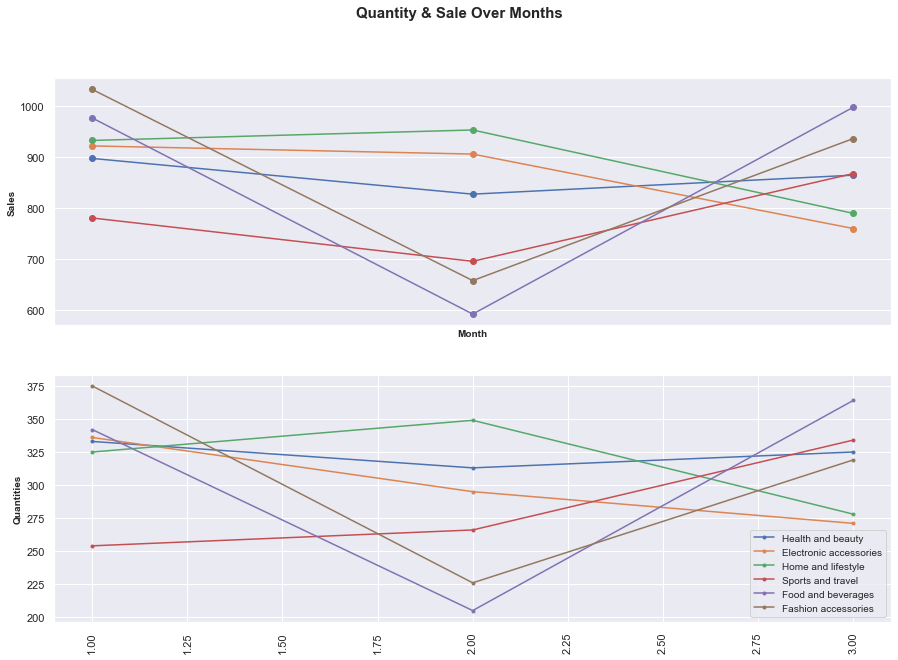

In [57]:
keys = [pair for pair, df in monthly_sale_productline.groupby(['Month'])]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))

fig.suptitle('Quantity & Sale Over Months', fontweight = 'bold', fontsize=15)
ax1.plot(keys, monthly_sale_productline.groupby(['Month']).sum(), 'o-')
ax1.set_xticks([])
plt.xticks(rotation =90)
ax1.set_ylabel('Sales', fontweight = 'bold', fontsize=10)
ax1.set_xlabel('Month', fontweight = 'bold', fontsize=10)
ax2.plot(keys, monthly_quantity_productline.groupby(['Month']).sum(), '.-')
ax2.set_ylabel('Quantities', fontweight = 'bold', fontsize=10)
leg = tuple(sales_df['Product line'].unique())
plt.legend(leg, loc='lower right', fontsize='10')

plt.show()

**Nhận xét**:
- Nhìn chung có vẻ số lượng bán ra và tổng doanh thu của từng mặt hàng qua các tháng hoạt động một cách bình thường. 
- Ví dụ như vào tháng 1, các dòng sản phẩm `Sport and travel`, `Home and lifestyle` có số lượng bán ra và doanh thu đạt được là vô cùng ấn tượng nhưng vào tháng 2, số lượng cũng như doanh thu sụt giảm đi rất nhiều. Nhiều khả năng vào tháng 1 là tháng đầu năm, các gia đình có xu hướng nghĩ dưỡng, đi du lịch và mua sắm đồ dùng gia đình là nhiều hơn đáng kể.

In [53]:
a = tuple(sales_df['Product line'].unique())
print(a)

('Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages', 'Fashion accessories')


---

### Câu hỏi 5

#### Lợi nhuận giữa của các dòng sản phẩm tại các thành phố là như thế nào?

**Lợi ích :** Nếu biết được mức lợi nhuận của các dòng sản phẩm ở các thành phố hay nói cách khác có thể biết được dòng sản phẩm mà thành phố đó ưa chuộng. Siêu thị có thể cân nhắc mở thêm chi nhánh tại thành phố đó và tập trung vào sản phẩm đó nhiều hơn cũng như đẩy mạnh việc quảng cáo và truyền thông đến khách hàng khi siêu thị khai trương.

- **Bước 1 :** Tạo Dataframe từ chứa các cột `City`, `Product line`, `Gross income`
- **Bước 2 :** Gom nhóm dữ liệu lại theo cột "City" và "Product line" thống kê xem lợi nhuận theo thành phố và từng dòng sản phẩm như thế nào.
- **Bước 3 :** Vẽ biểu đồ trực quan hóa giữa lợi nhận của các thành phố và các dòng sản phẩm và đưa ra nhận xét

#### Code bước 1:

In [54]:
profit_City = sales_df[["City","Product line","gross income"]]
profit_City

,City,Product line,gross income
0,Yangon,Health and beauty,26.1415
1,Naypyitaw,Electronic accessories,3.8200
2,Yangon,Home and lifestyle,16.2155
3,Yangon,Health and beauty,23.2880
4,Yangon,Sports and travel,30.2085
...,...,...,...
995,Naypyitaw,Health and beauty,2.0175
996,Mandalay,Home and lifestyle,48.6900
997,Yangon,Food and beverages,1.5920
998,Yangon,Home and lifestyle,3.2910


***Code bước 2 :***

In [55]:
profit_City = profit_City.groupby(['City','Product line']).sum()
profit_City = profit_City.unstack(0)
profit_City

gross income                      
City                       Mandalay  Naypyitaw     Yangon
Product line                                             
Electronic accessories     811.9735   903.2845   872.2435
Fashion accessories        781.5865  1026.6700   777.7385
Food and beverages         724.5185  1131.7550   817.2905
Health and beauty          951.4600   791.2060   599.8930
Home and lifestyle         835.6745   661.6930  1067.4855
Sports and travel          951.8190   750.5680   922.5095

### Code bước 3

<AxesSubplot:xlabel='Product line'>

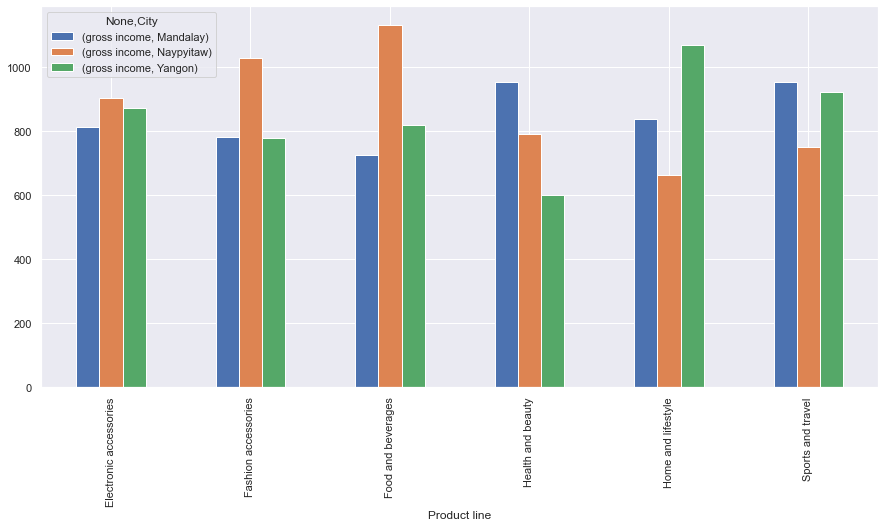

In [56]:
profit_City.plot.bar(figsize=(15,7))

- **Nhận Xét**
    - Từ đồ thị ta có thể thấy đối với thành phố  Naypyitaw thì dòng sản phẩm `Food and beverages` có giá trị lợi nhuận vượt trội so với các thành phố và các dòng sản phẩm khác. Có thể do người dân ở thành phố này thích mua đồ ăn và nước uống từ siêu thị hơn là ở chợ. Siêu thị có thể cân nhắc mở thêm chi nhánh ở thành phố Naypyitaw chuyên về mặt hàng này hoặc tập trung vào loại mặt hàng này nhiều hơn để tiếp cận khách hàng.
    - Người dân ở thành phố Yangon thì quan tâm đến `Home and lifestyle` nhiều hơn, có thể nói là vượt trội hơn hẳn các dòng sản phẩm khác. Từ đó siêu thị có thể chú ý đến mặt hàng này nhiều hơn trong việc kinh doanh tại thành phố Yangon này.
    - Người dân ở thành phố Mandalay thì chuộng mặt hàng `Helthy and beauty` và `Sport and travel` nhiều hơn. Siêu thị cũng nên cân nhắc 2 dòng sản phẩm này tại thành phố Mandalay.
    - Đối với những sản phẩm ở các thành phố như `Home and lifestyle` tại thành phố Mandalay, `Health and beauty` tại thành phố Yangon và `Food and beverages` tại thành phố Mandalay vẫn đưa về lợi nhuận cho siêu thị. Tuy nhiên lợi nhuận còn thấp so với các dòng sản phẩm khác. Siêu thị cần cho chiến lược đối với những dòng sản phẩm này. Có thể tập trung mạnh vào tiếp thị để người dân biết đến hoặc nhập mặt hàng về ít hơn để tránh việc lỗ do không bán được hàng.

---

## Tài liệu tham khảo

- **Video, HW và colab bài giảng của thầy**
- **Một số đoạn code nhỏ trên stackoverflow**
- **Tham khảo câu hỏi nhỏ ngay trên kangle**

---

## Nhìn lại quá trình làm đồ án và môn học

### Khó khăn và thuận lợi

-    **Khó khăn những ngày đầu học môn học :**
    - Ngày đầu khi vừa học môn này có rất nhiều thứ lạ và thấy khó khăn khi tiếp xúc lần đầu nhưng dần dần cũng vượt qua và tiến bộ hơn sau những HW của thầy.
    - Phải chống chọi với những cơn buồn ngủ buổi buổi sáng. May mắn khi học online và thầy không điểm danh nên có thể xem lại video được.
    - Phải làm những bài tập mà không biết code sao cho đúng để đáp ứng được yêu cầu vì thầy không cho xài vòng for nhưng bù lại học được cách code ngắn gọn của thầy.
-    **Khi nhận đồ án :**
    - Việc chọn nhóm thì bọn em khá là thuận lợi vì đã quen nhau từ trước.
    - Trong quá trình làm bài thì bước khó nhất vẫn là chọn dataset vì mỗi người sẽ cảm thấy những dataset khác nhau nhưng cuối cùng cũng chốt do không có lựa chọn tốt hơn.
    - Phần tiền xử lí chúng em khá là thuận lợi vì có HW của thầy cũng như có sự tương đồng với môn nhập môn khoa học dữ liệu nên có thể tham khảo được nhiều điều.
    - Việc đặt câu hỏi cũng khá là khó khăn đối với nhóm vì phải vừa đặt ra những câu hỏi hợp lí và đảm bảo code phù hợp.
    - Đồ án thầy cho 1 tháng nên thời gian khá thong thả nhưng mà do kì này bọn em đăng kí quá nhiều môn học (**STRESS** nhất vẫn là nhiều deadline dí cùng một lúc) nên trong 1 tháng đó có những deadline của các môn còn lại cùng việc ôn thi cuối kì nên thời gian hoàn thành của các thành viên không đồng nhất mà phải đợi bạn làm xong mới tiếp tục được. Do đăng kí môn khác nhau nên deadline môn khác không giống nhau.
    - Sau khi hoàn thành thì hiểu phần code của các thành viên trong nhóm và chuẩn bị cho phần thuyết trình cũng khá là mất thời gian vì phải sửa code sao cho dễ hiểu và làm cho thành viên trong nhóm cũng hiểu những điều mình code. Không biết sau này đi làm có hiểu được phần code của các thành viên trong team không nữa :))
    - **Nếu có thêm thời gian**, tụi em sẽ nghiên cứu áp dụng thuật toán KMean hoặc KNN để gom nhóm dữ liệu và dự đoán điểm `Rating` của một dòng sản phẩm mới.

### Nhận được gì sau môn học

- Biết sử dụng được được các thư viện pandas numpy matplotlib và nhiều thư viện khác nữa
- Biết sử dụng python tốt hơn (Trước em toàn code c++)
- Biết sử dụng git và linux.
- Nắm rõ hơn về quy trình của ngành khoa học dữ liệu trong việc thu thập, tiền xử lí cũng như khám phá những điều mà dữ liệu có thể đưa lại.
- Đỡ mông lung hơn khi bước vào ngành này do cũng nắm được quy trình của ngành trong tương lại.
- Biết cách phân chia công việc và làm việc nhóm tốt hơn.
- Biết giúp đỡ nhau và đồng cảm với nhau hơn giữa các thành viên sau khi hoàn thành đồ án.